----
# Wprowadzenie - część 1
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

## 0. Zagadnienia do opanowania przed zajęciami
### 0.1. Zapoznanie z podstawami językiem programowania *Python*
https://www.w3schools.com/python/python_intro.asp  
### 0.2. Zapoznanie z postawami biblioteki *numpy*
https://www.w3schools.com/python/numpy_intro.asp  
https://numpy.org/devdocs/user/quickstart.html  
### 0.3. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.4. Przydatne informacje:
Funkcje z biblioteki *numpy* potrzebne do zrealizowania ćwiczenia:  
`numpy.linspace, numpy.sin, numpy.min, numpy.max, numpy.random.uniform, numpy.random.normal, numpy.poly1d, numpy.polymul, numpy.polyder, numpy.polyval`  
Dokumentacja i opisy poszczególnych funkcji *numpy*:  
https://numpy.org/doc/stable/reference/    

Funkcje z biblioteki *matplotlib* potrzebne do zrealizowania ćwiczenia:  
`matplotlib.pyplot.figure, matplotlib.pyplot.plot, matplotlib.pyplot.xlabel, matplotlib.pyplot.ylabel, matplotlib.pyplot.grid, atplotlib.pyplot.axis, matplotlib.pyplot.subplot`  
Dokumentacja i opisy poszczególnych funkcji *matplotlib*:  
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot




In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
default_figsize=(14, 8)

----
## 1. Rysowanie wykresów
----
### Zadanie: Narysuj wykres jednego okresu funkcji $f(\omega) = sin(\omega + \frac{\pi}{4})$
* zmień kolor wykresu
* dodaj opisy osi i tytuł wykresu
* zastosuj 10% marginesy

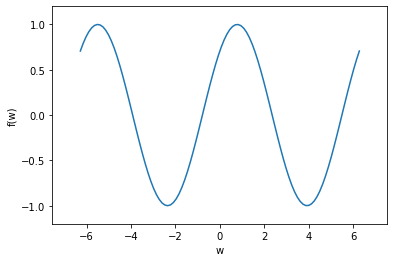

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt #importy można przerzuć tutaj, albo odpalić cały arkusz >> (ten znaczek u góry)
default_figsize=(14, 8)

def introduction_plot_sinus():
    #narysuj wykres   
    omega = np.linspace(-2*np.pi,2*np.pi,100) #np.linespace(poczatek, koniec, ilosc_probek) - zbiór wartośći - x - w
    funkcja = np.sin(omega + (np.pi/4))  #konkretna funkcja(zbiór wartości) - zbiór argumentów - y - f(w)
    figura_1 = plt.figure()
    plt.plot(omega, funkcja)
    #dodaj opisy osi i tytuł wykresu 
    plt.xlabel("w")
    plt.ylabel("f(w)")
    #zastosować 10% marginesy
    plt.margins(0.1, 0.1)
    return
    
introduction_plot_sinus()

----
## 2. Podział okna wykresu
----
### Zadanie: Używając „subplot” narysuj wykres 3 funkcji w następujący sposób:
(dla x w zakresie $<-0,2\pi>$)
<table>
  <tr>
    <td colspan="2" bgcolor="blue" width="200" height="100" style="color: white; text-align:center">sin(x)</td>
  </tr>
  <tr>
    <td bgcolor="red" width="100" height="100" style="color: white; text-align:center">cos(x)</td>
    <td bgcolor="green" width="100" height="100" style="color: white; text-align:center">arctan(x)</td>
  </tr>
</table>

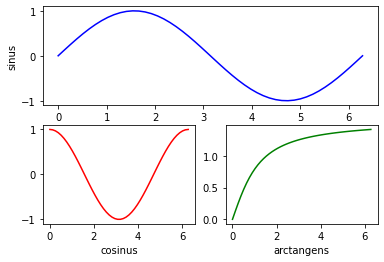

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
default_figsize=(14, 8)

def introduction_plot_subplot():
    #narysuj wykres
    x = np.linspace(0, 2 * np.pi)
    f_sinus = np.sin(x)
    f_cosinus = np.cos(x)
    f_arctangens = np.arctan(x)
    #rysowanie
    fig = plt.figure()
    grid = plt.GridSpec(2,2) #tworzymy siatkę 2x2 (2 wiersze, 2 kolumny)
    #sinus zjmie siatkę górną (pierwszy wiersz oraz dwie kolumny)
    #SINUS
    siatka_sinus = plt.subplot(grid[0,0:]) #':' - pozwala złączyć wiersze/kolumny
    siatka_sinus.plot(x, f_sinus, color="blue") #na siatce rysujemy sinusa
    plt.ylabel("sinus") #python jakoś "sam" ogarnia o który wykres nam chodzi
    #COSINUS
    siatka_cosinus = plt.subplot(grid[1,0]) #cosinus z dołu po lewej (1,0)
    siatka_cosinus.plot(x, f_cosinus, color="red")
    plt.xlabel("cosinus")
    #ARCTANGENS
    siatka_arctangens = plt.subplot(grid[1,1])
    siatka_arctangens.plot(x, f_arctangens, color="green")
    plt.xlabel("arctangens")
    return
    
introduction_plot_subplot()
#PORADNIK SUBPLOT
#https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html


---- 
## 3. Operacje na wielomianach
---- 
### Dla zdefiniowanych wielomianów:  
$ a(x) = x^4 + x^3 - x^2 - 1 $  
$ b(x) = x^3 - x + 1 $  
$ c(x) = x^5 - x^4 + x^3 - 1 $  
### Wylicz:  
$ d(x) = a(x) \cdot c(x)$  
$ e(x) = \frac{\partial d(x)}{\partial x}$  
$ f(x) = e(x) + b(x) - x^{3}$  
### Narysuj wykres wielomianu $f(x)$ dla $x\in<-1,1>$


mnożenie
   9     7     6     5     3     2
1 x - 1 x + 2 x - 2 x - 2 x + 1 x + 1
pochodna
   8     6      5      4     2
9 x - 7 x + 12 x - 10 x - 6 x + 2 x
dodawanie e+b
   8     6      5      4     3     2
9 x - 7 x + 12 x - 10 x + 1 x - 6 x + 1 x + 1
dodawanie e+b i odjęcie x^3
   8     6      5      4     2
9 x - 7 x + 12 x - 10 x - 6 x + 1 x + 1


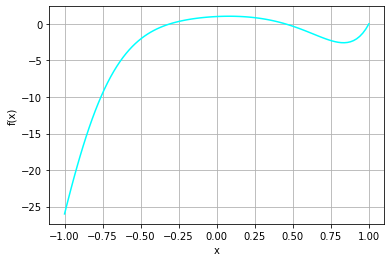

In [40]:
def introduction_plot_polynomial():
    #wykonaj operacje na wielomianach - funkcja numpy.poly1d (masz w necie)
    a = np.poly1d([1,1,-1, 0, -1]) #wielomian x^4+x^3-x^2-1
    b = np.poly1d([1,0, -1, +1])
    c = np.poly1d([1,-1,1,0, 0, -1])
    d = a*c
    e = np.polyder(d)
    print("mnożenie")
    print(d) #mnozenie
    print("pochodna")
    print(e) #pochodna
    print("dodawanie e+b")
    print(e+b)
    f = e + b + np.poly1d([-1,0,0,0])
    print("dodawanie e+b i odjęcie x^3")
    print(f)
    x = np.linspace(-1,1,100)
    f_x  = f(x) #coś jak sin(x) - wektor wartości funkcji w punktach
    fig = plt.figure()
    narysuj_f = plt.plot(x,f_x, color="cyan")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid() #siateczka
    #wyświetl wielomiany
    #narysuj wykres
    
    return

introduction_plot_polynomial()

---- 
## 4. Sympy - moduł obliczeń symbolicznych
---- 
Funkcje z biblioteki sympy potrzebne do zrealizowania ćwiczenia:  
* deklaracja zmienej symbolicznej `t = sympy.Symbol('t')`, opcjonalnie z dodatkowymi atrybutami np. `t = sympy.Symbol('t', real=True)`.  
* wyznaczanie całki nieoznaczonej  $\int x^2 dx$ `sympy.integrate(x**2, x)`  
* wyznaczanie całki oznaczonej $\int_{a}^{b} x^2 dx$ `sympy.integrate(x**2, (x, a, b))`  
* wyświetlanie sformatowanego wyniku `display(  )`  
  
Wyznacz $\int t^2 dt$ oraz $\int_{-1}^{1} t^2 dt$ i wyświetl wyniki.

In [56]:
import numpy as np
import sympy
def introduction_symbolic():
    #zadeklaruj zmienną t
    t = sympy.Symbol('t')
    #wyznacz i wyświetl całkę nieoznaczoną
    in_x = sympy.integrate(t**2,t)
    display(in_x) #symbolicznie wynik
    print(in_x) #liniowo
    #wyznacz i wyświetl całkę oznaczoną
    in_x_oznaczona = sympy.integrate(t**2,(t,2,1)) #całka oznaczona
    display(in_x_oznaczona)
    return

introduction_symbolic()

t**3/3


----
## 5. Rozkłady statystyczne (zadanie dodatkowe)
----
### Zadanie: Wygeneruj wektor 100 000 elementów i wykreśl histogram składający się z 50 przedziałów
* wartości o rozkładzie równomiernym <-1; 1> 
* wartości o rozkładzie normalnym µ=0, σ=0.5

In [45]:
def introduction_plot_histogram():
    #wygeneruj wektory elementów
    #narysuj histogramy
    return    
    
introduction_plot_histogram()

---- 
## 6. THE END
---- 